## Image Classification using MLP (Multi-layered Perception)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score   
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os


license_types = os.listdir('/content/drive/MyDrive/datasets/dataset')
print(license_types)

print(f"Types of classes found : {len(license_types)}") 

['valid_plate', 'non_valid_plate']
Types of classes found : 2


### Data Pre-processing

In [ ]:
licenses = []


for item in license_types:
    # Get all the file names in the given directory
    all_licenses = os.listdir(f'/content/drive/MyDrive/datasets/dataset/{item}')
    #print(all_licenses)

    for license in all_licenses:
        licenses.append((item, f'/content/drive/MyDrive/datasets/dataset/{item}/{license}'))
        
print(len(licenses))

400


In [ ]:
# Build a dataframe
licenses_df = pd.DataFrame(data=licenses, columns=['class', 'image'])
print(licenses_df.head())
print(licenses_df.tail())

         class                                              image
0  valid_plate  /content/drive/MyDrive/datasets/dataset/valid_...
1  valid_plate  /content/drive/MyDrive/datasets/dataset/valid_...
2  valid_plate  /content/drive/MyDrive/datasets/dataset/valid_...
3  valid_plate  /content/drive/MyDrive/datasets/dataset/valid_...
4  valid_plate  /content/drive/MyDrive/datasets/dataset/valid_...
               class                                              image
395  non_valid_plate  /content/drive/MyDrive/datasets/dataset/non_va...
396  non_valid_plate  /content/drive/MyDrive/datasets/dataset/non_va...
397  non_valid_plate  /content/drive/MyDrive/datasets/dataset/non_va...
398  non_valid_plate  /content/drive/MyDrive/datasets/dataset/non_va...
399  non_valid_plate  /content/drive/MyDrive/datasets/dataset/non_va...


In [ ]:
# How many samples for each category are present
print(f"Total number of categories in the dataset : {len(licenses_df)}")

Total number of categories in the dataset : 400


In [ ]:
license_count = licenses_df['class'].value_counts()
print("licenses in each category: ")
print(license_count)

licenses in each category: 
valid_plate        200
non_valid_plate    200
Name: class, dtype: int64


In [ ]:
path = '/content/drive/MyDrive/datasets/dataset'

# Image size to be resized both for width and height
im_size = 300

images = []
labels = []

for item in license_types:
    # Get all the file names in the given directory
    data_path = path + '/' + str(item)
    filenames = [i for i in os.listdir(data_path)]

    for f in filenames:
        # Reading that image as array

        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))       # Resizing 300x300  
        images.append(img)
        labels.append(item)
        


In [ ]:
# Transform the image array to a numpy type

images = np.array(images)
images.shape

(400, 300, 300, 3)

In [ ]:
images.dtype # -> uint8

dtype('uint8')

In [ ]:
images = images.astype('float32') / 255.0
images.shape

(400, 300, 300, 3)

### Label Encoding and Splitting Training and Testing Data

In [ ]:
label = licenses_df['class'].values
# First 5 labels
print(label[:5])

['valid_plate' 'valid_plate' 'valid_plate' 'valid_plate' 'valid_plate']


In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label)
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
images, label = shuffle(images, label, random_state=1)

train_X, test_X, train_Y, test_Y = train_test_split(images, label, test_size=0.2, random_state=415)

# Inspect the shape of the training and testing
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(320, 300, 300, 3)
(320,)
(80, 300, 300, 3)
(80,)


### Image Classification using TensorFlow, Keras

In [ ]:
# Develop a sequential model using Tensorflow Keras
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(300,300,3)),          # Flatten the input image (Input Layer)
        keras.layers.Dense(256, activation=tf.nn.tanh),         # Hidden layer
        keras.layers.Dense(128, activation='sigmoid'),
        keras.layers.Dense(2, activation=tf.nn.softmax),        # Output Layer
    ])  

In [ ]:
# Summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 270000)            0         
                                                                 
 dense (Dense)               (None, 256)               69120256  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 69,153,410
Trainable params: 69,153,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compute the model parameters
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model with 25 epochs and 10 batches
history = model.fit(train_X, train_Y, epochs=150, batch_size=20, validation_split=0.33)

Epoch 1/150
11/11 [==============================] - 4s 343ms/step - loss: 1.2114 - accuracy: 0.4813 - val_loss: 1.1185 - val_accuracy: 0.4811
Epoch 2/150
11/11 [==============================] - 4s 329ms/step - loss: 0.8001 - accuracy: 0.5374 - val_loss: 0.7726 - val_accuracy: 0.5189
Epoch 3/150
11/11 [==============================] - 4s 328ms/step - loss: 0.7319 - accuracy: 0.5187 - val_loss: 0.7275 - val_accuracy: 0.4811
Epoch 4/150
11/11 [==============================] - 4s 329ms/step - loss: 0.7326 - accuracy: 0.5093 - val_loss: 0.6947 - val_accuracy: 0.5189
Epoch 5/150
11/11 [==============================] - 4s 330ms/step - loss: 0.7036 - accuracy: 0.5000 - val_loss: 0.6943 - val_accuracy: 0.4811
Epoch 6/150
11/11 [==============================] - 4s 330ms/step - loss: 0.6998 - accuracy: 0.4439 - val_loss: 0.6945 - val_accuracy: 0.4811
Epoch 7/150
11/11 [==============================] - 4s 328ms/step - loss: 0.7079 - accuracy: 0.4720 - val_loss: 0.6982 - val_accuracy: 0.4811

In [ ]:
y_pred = np.argmax(model.predict(test_X), axis=-1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Metrics

### Summarize history for accuracy

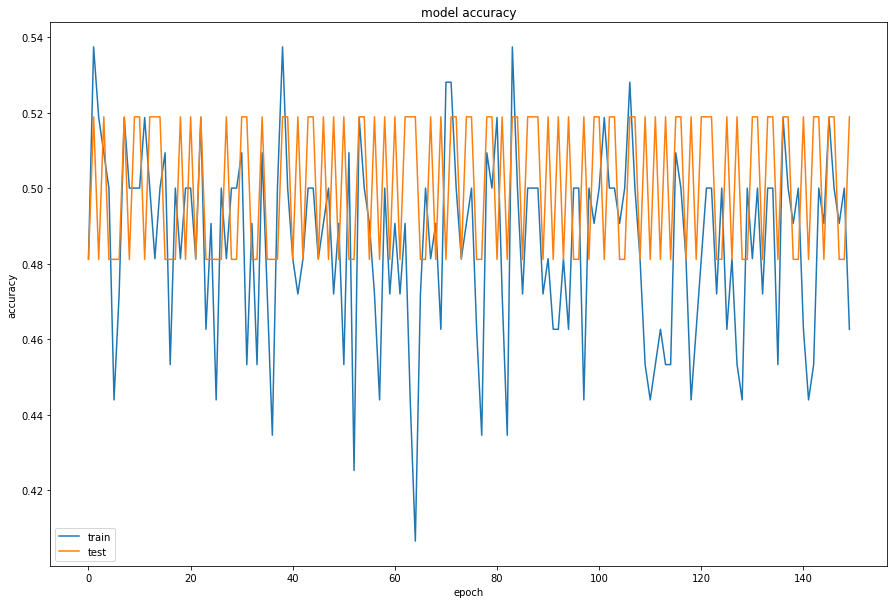

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

### Summarize history for loss

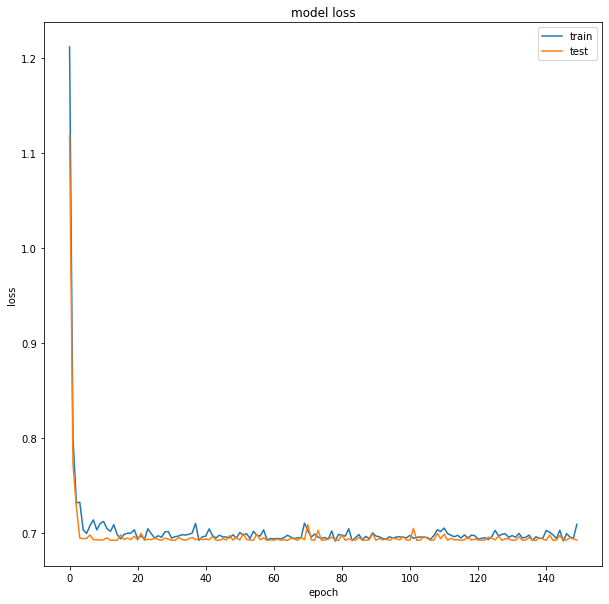

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Confusion Matrix

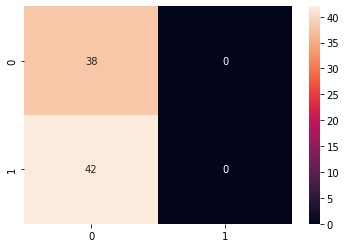

In [ ]:
cm = confusion_matrix(test_Y, y_pred)
sns.heatmap(data = cm, annot=True)

### Recall Metric

In [ ]:
# Calculate recall
recall = recall_score(test_Y, y_pred, average='weighted')
print(f"Recall: {recall * 100}%")

Recall: 47.5%


### F1 Score Metric

In [ ]:
f1_score_metric = f1_score(test_Y, y_pred, average='weighted')
print(f"F1 score: {round(f1_score_metric * 100, 2)}%")

F1 score: 30.59%


### Precision Metric

In [ ]:
precision = precision_score(test_Y, y_pred, average='weighted')
print(f"Precision: {round(precision * 100, 2)}%")

Precision: 22.56%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Accuracy Metric

In [ ]:
accuracy = accuracy_score(test_Y, y_pred)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 47.5%


## Testing the Model

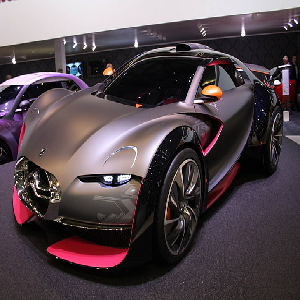

In [ ]:
from keras.preprocessing.image import load_img

new_image = load_img('/content/car-pictures-for-desktop-wallpaper-preview.jpg', target_size=(300,300))
new_image

In [ ]:
# Convert the image pixels to a numpy array
new_image = np.array(new_image)
new_image.shape

(300, 300, 3)

In [ ]:
# Reshaping data for the model
new_image = new_image.reshape((1, new_image.shape[0], new_image.shape[1], new_image.shape[2]))  # 300, 300, 3

In [ ]:
test_img = model.predict(new_image)
test_img

print(f'''non_valid_license = {round(test_img[0][0] * 100, 2)}% 
\nvalid_license = {round(test_img[0][1] * 100, 2)}% ''')
# first index = non_valid_plate percentage  -> 53.49% non_valid_license
# second index = valid_plate percentage     -> 46.50% valid_license

non_valid_license = 53.49% 

valid_license = 46.51% 
